                            Loan Application Status Prediction Project

In [119]:
import pandas as pd

In [120]:
import numpy as np

In [121]:
import matplotlib.pyplot as plt

In [122]:
import seaborn as sns

In [123]:
import warnings

In [124]:
warnings.filterwarnings('ignore')

In [125]:
df=pd.read_csv("loan.csv")

In [126]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [127]:
df.head()#top 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [128]:
df.tail()#bottom 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [129]:
df.sample()#randomly selected row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y


In [130]:
df.keys()#columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [131]:
df.shape

(614, 13)

In [132]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [133]:
df.info()#to get information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
df.describe()#statiscal info

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [135]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

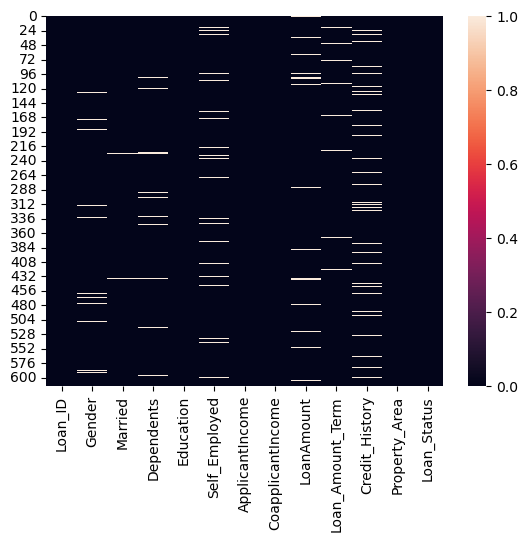

In [137]:
sns.heatmap(df.isnull())

In [138]:
#Categorical Variables (Gender, Married, Dependents, Self_Employed):

In [139]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [140]:
#Numerical Variables (LoanAmount, Loan_Amount_Term, Credit_History):

In [141]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

In [142]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

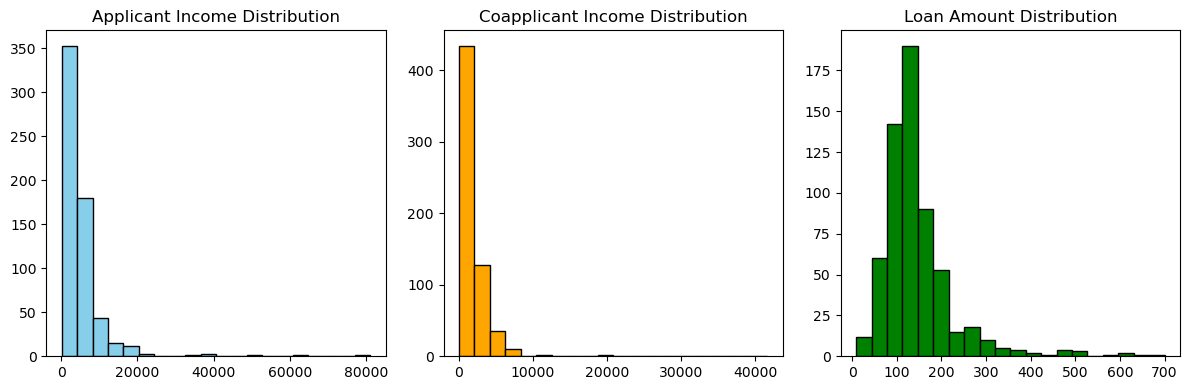

In [143]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(df['ApplicantIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Applicant Income Distribution')

plt.subplot(132)
plt.hist(df['CoapplicantIncome'], bins=20, color='orange', edgecolor='black')
plt.title('Coapplicant Income Distribution')

plt.subplot(133)
plt.hist(df['LoanAmount'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Loan Amount Distribution')

plt.tight_layout()
plt.show()

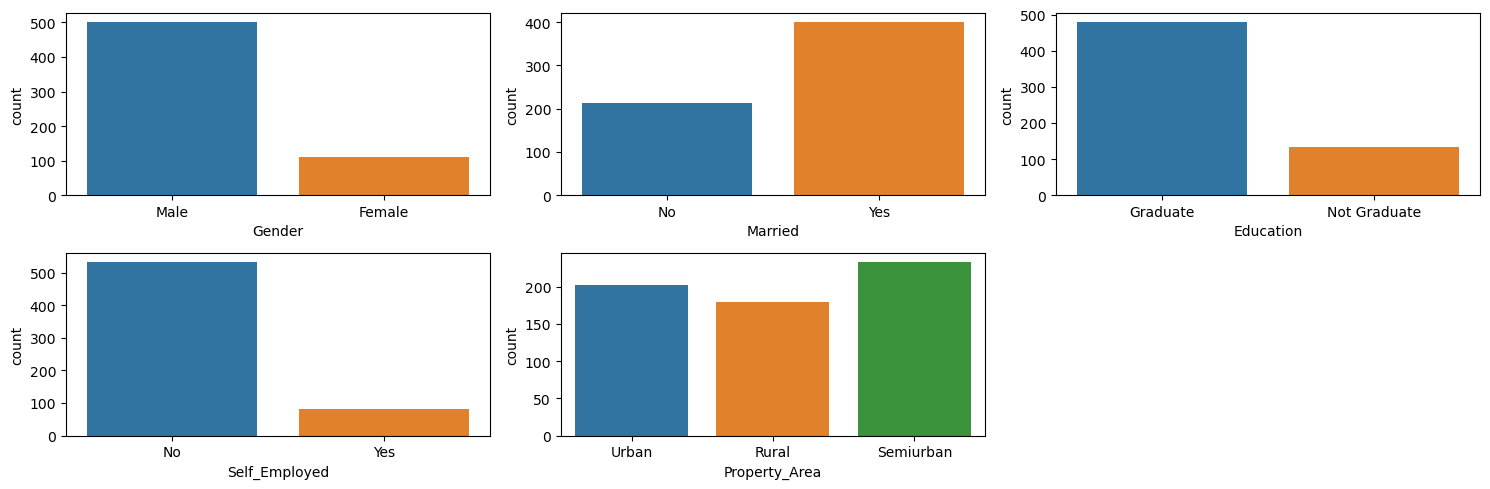

In [144]:
plt.figure(figsize=(15, 5))

plt.subplot(231)
sns.countplot(x='Gender', data=df)

plt.subplot(232)
sns.countplot(x='Married', data=df)

plt.subplot(233)
sns.countplot(x='Education', data=df)

plt.subplot(234)
sns.countplot(x='Self_Employed', data=df)

plt.subplot(235)
sns.countplot(x='Property_Area', data=df)
plt.tight_layout()
plt.show()

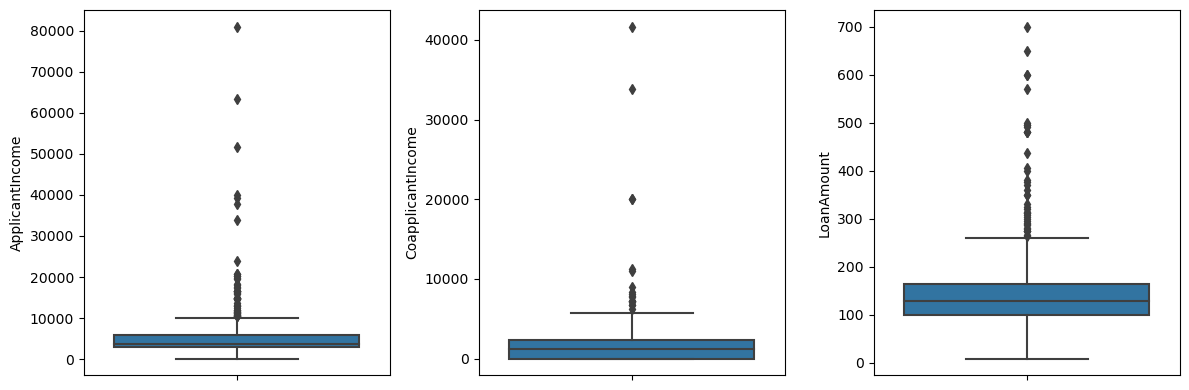

In [145]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.boxplot(y='ApplicantIncome', data=df)

plt.subplot(132)
sns.boxplot(y='CoapplicantIncome', data=df)

plt.subplot(133)
sns.boxplot(y='LoanAmount', data=df)

plt.tight_layout()
plt.show()

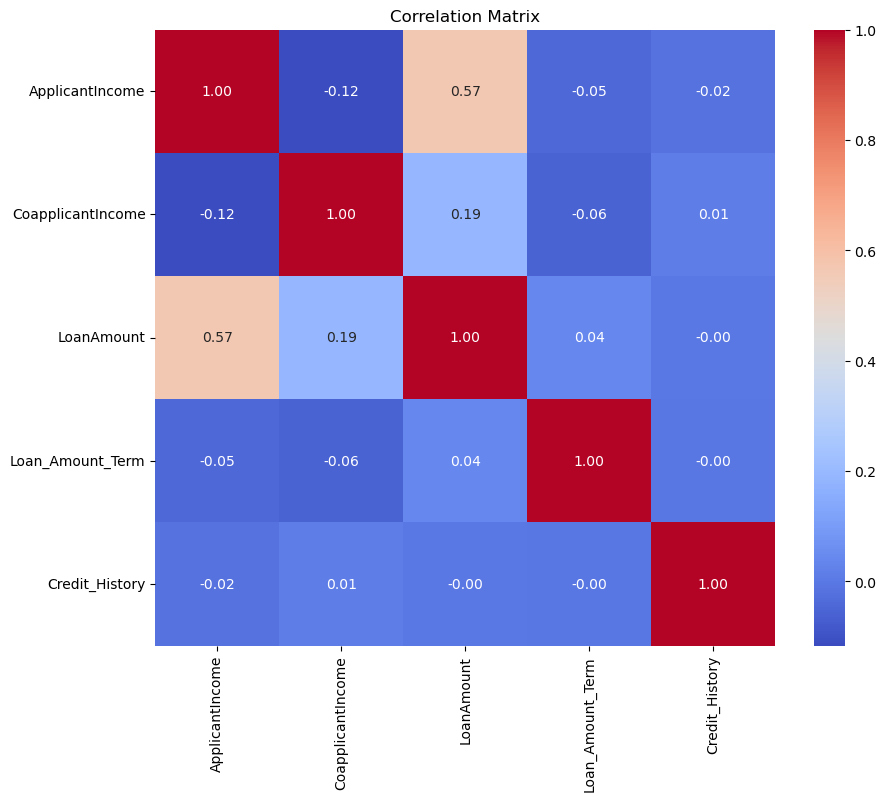

In [146]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [147]:
#check skewness

In [148]:
skewness = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew()
print(skewness)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
dtype: float64


In [149]:
#Handle Skewness:

df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])

In [150]:
#recheck skewness

In [151]:
skewness_after = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew()
print(skewness_after)

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
dtype: float64


In [152]:
#checking outliers

In [153]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a boolean mask for outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Print rows with outliers
print(df[outliers])

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
7    LP001014    Male     Yes         3+      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
600  LP002949  Female      No         3+      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
7           8.018625           7.826044    5.068904           

In [154]:
#remove outliers

In [155]:
df = df[~outliers]

In [156]:
#unique values of all columns

In [157]:
r=[]
for columns in df:
    r=df[columns].nunique()
    print(r)

417
2
2
4
2
2
351
213
153
1
1
3
2


In [158]:
#value count of each column

In [159]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP001953    1
LP002300    1
LP002297    1
LP002284    1
           ..
LP001666    1
LP001665    1
LP001664    1
LP001658    1
LP002984    1
Name: Loan_ID, Length: 417, dtype: int64


Male      343
Female     74
Name: Gender, dtype: int64


Yes    268
No     149
Name: Married, dtype: int64


0     257
2      68
1      62
3+     30
Name: Dependents, dtype: int64


Graduate        334
Not Graduate     83
Name: Education, dtype: int64


No     366
Yes     51
Name: Self_Employed, dtype: int64


7.824446    8
8.430327    5
8.111928    5
8.699681    5
7.857094    4
           ..
8.273337    1
9.305741    1
8.136518    1
7.553811    1
8.933796    1
Name: ApplicantIncome, Length: 351, dtype: int64


0.000000    173
7.642044      5
7.418781      4
7.824446      4
7.286192      3
           ... 
7.934513      1
6.918695      1
7.436028      1
7.951911      1
5.484797      1
Name: CoapplicantIncome, Length: 213, dtype: int64


4.859812    23
4.795791    16
4.709530    13
4.615121    

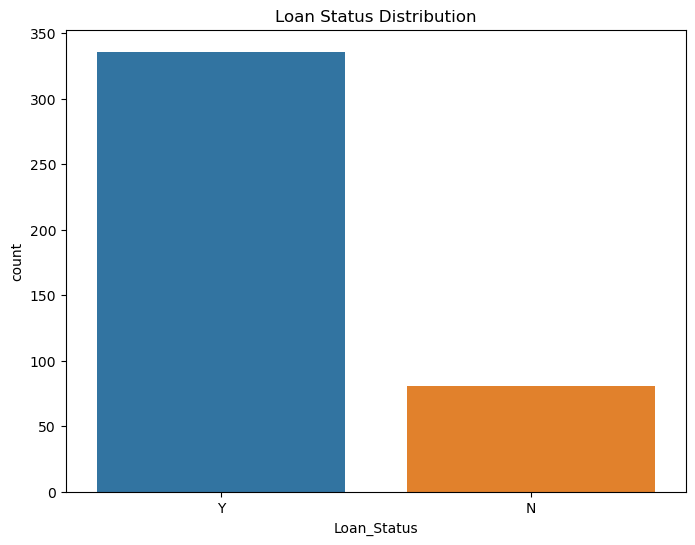

In [160]:
# Countplot for Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

In [161]:
# Calculate and print the class distribution
class_distribution = df['Loan_Status'].value_counts(normalize=True)
print(class_distribution)

Y    0.805755
N    0.194245
Name: Loan_Status, dtype: float64


In [162]:
X = df.drop('Loan_Status', axis=1)  
y = df['Loan_Status']  

In [163]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is your feature DataFrame
label_encoder = LabelEncoder()
X['Loan_ID'] = label_encoder.fit_transform(X['Loan_ID'])

In [164]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'X' is your feature DataFrame
ordinal_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Apply ordinal encoding to the specified columns
X[ordinal_cols] = encoder.fit_transform(X[ordinal_cols])

In [165]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [166]:
from imblearn.under_sampling import RandomUnderSampler# undersampling

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [167]:
from imblearn.over_sampling import SMOTE

# Define the oversampler (SMOTE in this case)
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [168]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is  feature DataFrame and 'y' is target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is feature DataFrame
scaler = StandardScaler()

# Apply Standard Scaling to the entire feature set
X_scaled = scaler.fit_transform(X)

In [170]:
X_test_scaled = scaler.transform(X_test)

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is  feature DataFrame
vif_data = X.copy()
vif_data['Intercept'] = 1  

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Identify variables with high VIF (indicating multicollinearity)
high_vif_variables = vif[vif['VIF'] > 10]['Variable']

# Remove or combine highly correlated variables
X_filtered = X.drop(high_vif_variables, axis=1)

In [172]:
# Assuming 'X' is  feature DataFrame
X['TotalIncome'] = X['ApplicantIncome'] + X['CoapplicantIncome']

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [174]:
# Create instances of the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [175]:
# Assuming 'X_train' and 'X_test' do not contain 'Loan_ID'
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 82.14%
Decision Tree Accuracy: 71.43%
Random Forest Accuracy: 77.38%
Support Vector Machine Accuracy: 79.76%
K-Nearest Neighbors Accuracy: 75.00%
Naive Bayes Accuracy: 73.81%


In [176]:
# we can see that Logistic Regression return max accuracy

In [177]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{model_name} trained successfully.')

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Support Vector Machine trained successfully.
K-Nearest Neighbors trained successfully.
Naive Bayes trained successfully.


In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [182]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', pos_label='Y')
    recall = recall_score(y_test, y_pred, average='binary', pos_label='Y')
    f1 = f1_score(y_test, y_pred, average='binary', pos_label='Y')
    
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'ROC-AUC: {roc_auc:.2f}')
    
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy (mean): {cv_scores.mean() * 100:.2f}%')
    print(f'Cross-Validation Accuracy (std): {cv_scores.std() * 100:.2f}%')
    print('\n')

Model: Logistic Regression
Accuracy: 82.14%
Precision: 0.82
Recall: 1.00
F1-score: 0.90
ROC-AUC: 0.51
Cross-Validation Accuracy (mean): 80.58%
Cross-Validation Accuracy (std): 0.42%


Model: Decision Tree
Accuracy: 73.81%
Precision: 0.83
Recall: 0.85
F1-score: 0.84
ROC-AUC: 0.51
Cross-Validation Accuracy (mean): 63.39%
Cross-Validation Accuracy (std): 21.58%


Model: Random Forest
Accuracy: 75.00%
Precision: 0.79
Recall: 0.93
F1-score: 0.86
ROC-AUC: 0.51
Cross-Validation Accuracy (mean): 75.34%
Cross-Validation Accuracy (std): 8.68%


Model: Support Vector Machine
Accuracy: 79.76%
Precision: 0.80
Recall: 1.00
F1-score: 0.89
ROC-AUC: 0.51
Cross-Validation Accuracy (mean): 80.58%
Cross-Validation Accuracy (std): 0.42%


Model: K-Nearest Neighbors
Accuracy: 75.00%
Precision: 0.79
Recall: 0.94
F1-score: 0.86
ROC-AUC: 0.51
Cross-Validation Accuracy (mean): 54.07%
Cross-Validation Accuracy (std): 22.97%


Model: Naive Bayes
Accuracy: 73.81%
Precision: 0.81
Recall: 0.88
F1-score: 0.84
ROC-AUC

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Evaluate the model with the best parameters on your test set
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy * 100:.2f}%")

In [ ]:
# Get feature importances
importances = best_estimator.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the top n feature importances
n = 10  # You can adjust this value based on your preference
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances")
plt.bar(range(n), importances[indices][:n], align="center")
plt.xticks(range(n), feature_names[indices][:n], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the best model
joblib.dump(best_estimator, 'best_model.pkl')